#### 🍷Wine Quality Prediction By using Classification

#### ➡️IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df["quality"].value_counts()    

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

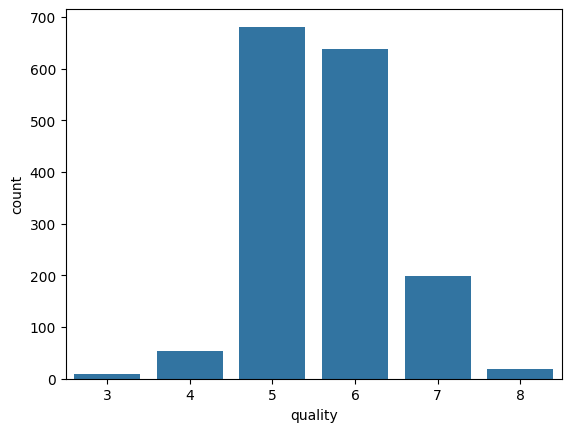

In [9]:
sns.countplot(x='quality',data=df)  

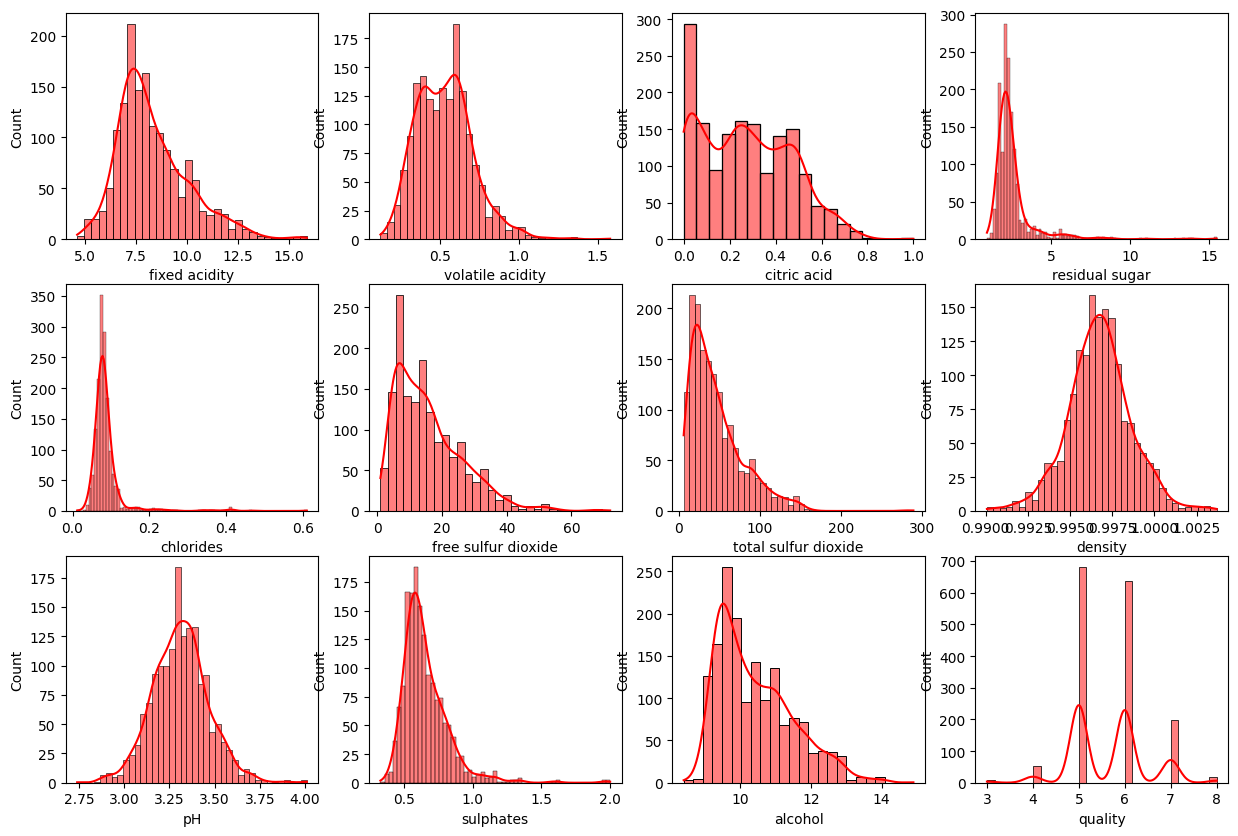

In [10]:
Num_fea =df.select_dtypes(exclude='object')
#distribution of plot each as subplot
fig,axes =plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
        sns.histplot( df[df.columns[k]],ax=axes[i][j],kde=True,color='red')
        k+=1
plt.show()

In [11]:
# apply log transformation on feature
# df["volatile acidity"]=np.log1p(df["volatile acidity"])
# df["citric acid"]=np.log1p(df["citric acid"])
df["residual sugar"]=np.log1p(df["residual sugar"])
df["chlorides"]=np.log1p(df["chlorides"])
df["free sulfur dioxide"]=np.log1p(df["free sulfur dioxide"])
df["total sulfur dioxide"]=np.log1p(df["total sulfur dioxide"])
df["sulphates"]=np.log1p(df["sulphates"])
# df["alcohol"]=np.log1p(df["alcohol"])

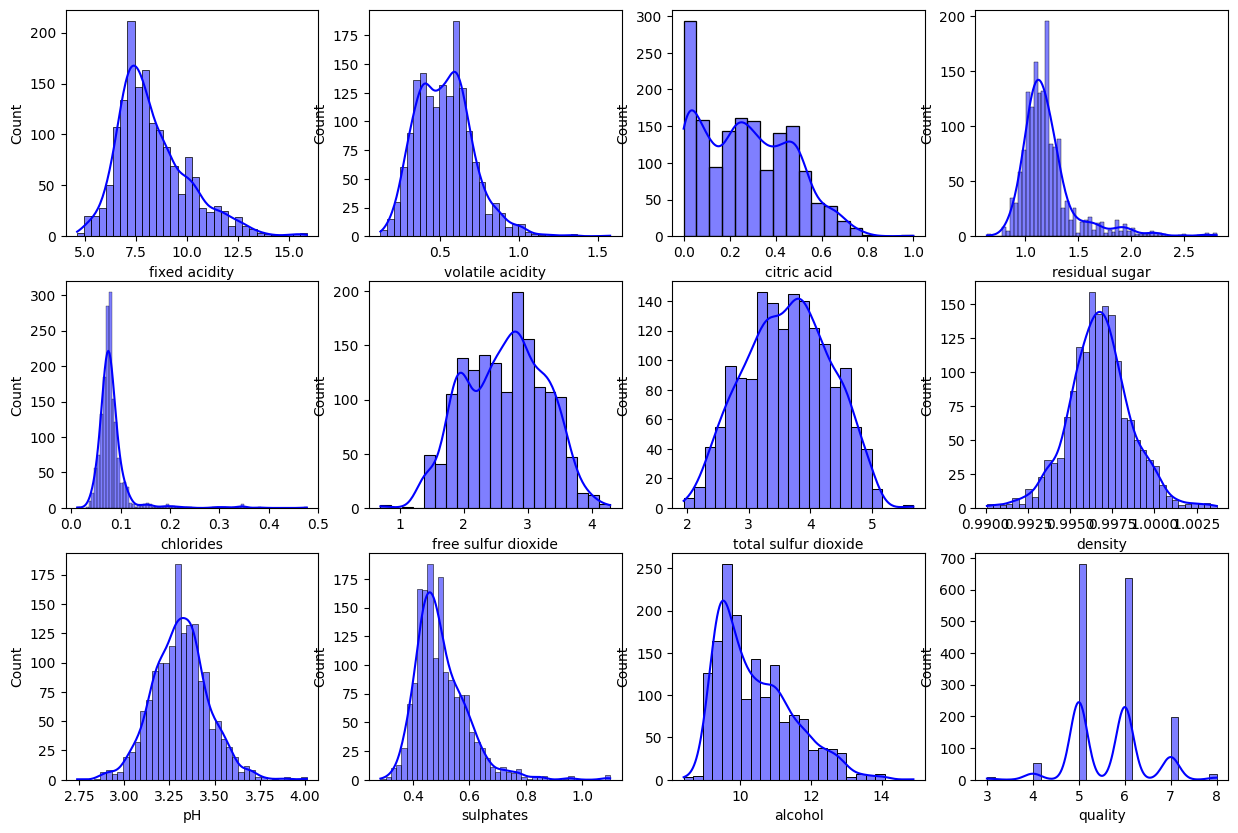

In [12]:
Num_fea =df.select_dtypes(exclude='object')
#distribution of plot each as subplot
fig,axes =plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
        sns.histplot( df[df.columns[k]],ax=axes[i][j],kde=True,color='blue')
        k+=1
plt.show()

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(240)

In [15]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [16]:
x=df.drop('quality',axis='columns')
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,9.4
1,7.8,0.88,0.00,1.280934,0.093490,3.258097,4.219508,0.9968,3.20,0.518794,9.8
2,7.8,0.76,0.04,1.193922,0.088011,2.772589,4.007333,0.9970,3.26,0.500775,9.8
3,11.2,0.28,0.56,1.064711,0.072321,2.890372,4.110874,0.9980,3.16,0.457425,9.8
5,7.4,0.66,0.00,1.029619,0.072321,2.639057,3.713572,0.9978,3.51,0.444686,9.4


In [17]:
y=df['quality']
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x,y = oversample.fit_resample(x.fillna(0),y)

In [19]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,1.216325,0.083563,2.640464,3.638549,0.996709,3.309787,0.501352,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.263457,0.040815,0.623095,0.688594,0.001869,0.155036,0.094269,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.641854,0.011929,0.693147,1.945910,0.990070,2.740000,0.285179,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.064711,0.067659,2.079442,3.135494,0.995600,3.210000,0.438255,9.500000,5.000000
50%,7.900000,0.520000,0.260000,1.163151,0.076035,2.708050,3.663562,0.996700,3.310000,0.482426,10.200000,6.000000
75%,9.200000,0.640000,0.430000,1.280934,0.087095,3.091042,4.158883,0.997820,3.400000,0.548121,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.803360,0.476855,4.290459,5.669881,1.003690,4.010000,1.098612,14.900000,8.000000


#### ➡️FUTURE SCALING

In [21]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.496592,0.443472,-1.257235,-0.665964,-0.268543,0.010501,0.253842,0.718600,1.128810,-0.647771,-1.135066
1,-0.260586,1.168713,-1.257235,0.176303,0.302984,1.274451,1.240765,0.200606,-0.898274,0.189158,-0.807521
2,-0.260586,0.685219,-1.061855,-0.162638,0.148256,0.480781,0.925479,0.304205,-0.505935,-0.014331,-0.807521
3,1.745470,-1.248758,1.478092,-0.665964,-0.294798,0.673324,1.079338,0.822199,-1.159834,-0.503904,-0.807521
4,-0.496592,0.282307,-1.257235,-0.802657,-0.294798,0.262495,0.488959,0.718600,1.128810,-0.647771,-1.135066


#### ➡️TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#### ➡️MODEL SELECTION

In [23]:
#  Apply LogRegression

from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(x_train,y_train)
LogReg_acc=round(model_LogReg.score(x_test, y_test)*100)
LogReg_acc

59

In [24]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
DTR_Accuracy

81

In [25]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(x_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(x_test)) * 100)
RFR_Accuracy

91

In [26]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

77

In [27]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
SVR_Accuracy

87

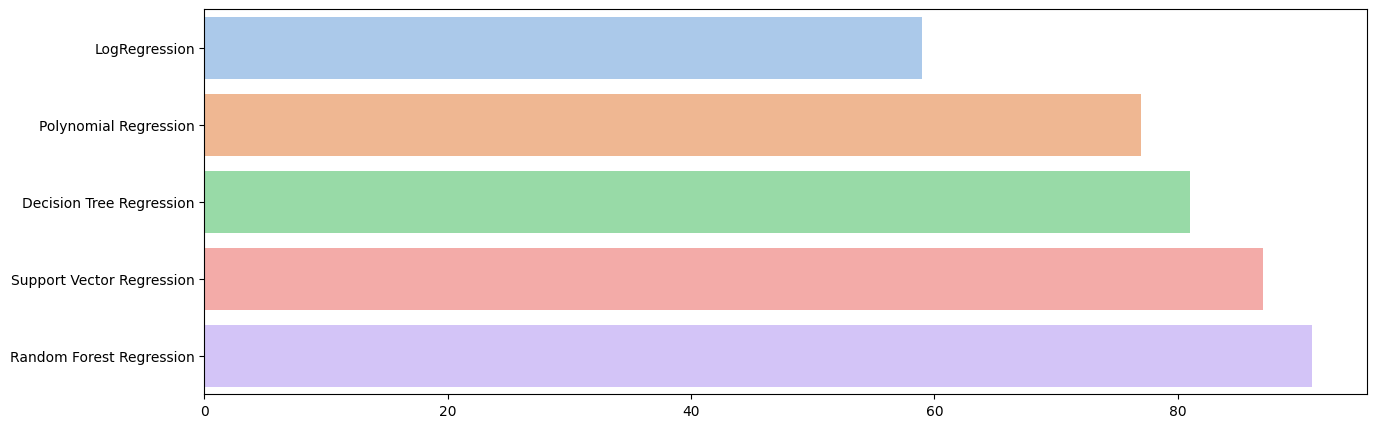

In [28]:
models = ["LogRegression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LogReg_acc,PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel')
plt.show()

In [29]:
# heatmap for confusion matrix (ensure cm exists and is 2-d)
from sklearn.metrics import confusion_matrix

try:
    # check if cm is defined and 2-D
    if not ( 'cm'in globals() and hasattr (cm, "ndim")  and cm.ndim ==2):
        raise NameError 
except NameError:
    cm = confusion_matrix(y_test, RF_model.predict(x_test))

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
cm




ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

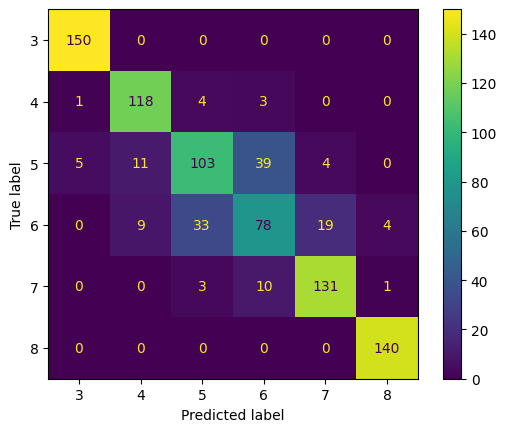

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [3,4,5,6,7,8])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

RF_model.fit(x_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':7.4,
    'volatile acidity':0.70,
    'citric acid':0.00,
    'residual sugar':0.645738,
    'chlorides':0.9,
    'free sulfur dioxide':0.56,
    'total sulfur dioxide':98,
    'density':1,
    'pH':8,
    'sulphates':6.8,
    'alcohol':5.3
}

# create dataframe with user input 
user_input= pd.DataFrame([feature_values],columns=feature_names)

# scaler
user_input = scaler.transform(user_input)
# make the prediction 
prediction = RF_model.predict(user_input)

print("predicted value", prediction)

predicted value [5]


In [44]:
prediction = RF_model.predict(user_input)
print("Predicted Wine Quality:", prediction[0])


Predicted Wine Quality: 5.8


In [45]:
import numpy as np
import pandas as pd

# Feature order MUST match training
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

# Example input (change values to test)
feature_values = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.70,
    'citric acid': 0.00,
    'residual sugar': 2.0,
    'chlorides': 0.08,
    'free sulfur dioxide': 15,
    'total sulfur dioxide': 46,
    'density': 0.9978,
    'pH': 3.51,
    'sulphates': 0.56,
    'alcohol': 9.4
}

# Create DataFrame
user_input = pd.DataFrame([feature_values], columns=feature_names)


In [46]:
prediction = RF_model.predict(user_input)

print("Predicted Wine Quality:", prediction[0])

if prediction[0] <= 4:
    print("❌ Poor Quality Wine")
elif prediction[0] <= 6:
    print("⚠️ Average Quality Wine")
else:
    print("✅ Good Quality Wine")


Predicted Wine Quality: 5.8
⚠️ Average Quality Wine


In [ ]:
# save the model
import pickle
filename = 'scaler_model.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [ ]:
# save random forest model
import pickle
filename = 'finalized_RFmodel.sav'
pickle.dump(RF_model, open(filename, 'wb'))